 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
print("Monash Uni - Jan 2021 - Fintech Bootcamp - Homework3")

Monash Uni - Jan 2021 - Fintech Bootcamp - Homework3


In [3]:
whale_df = pd.read_csv ('./Resources/whale_returns.csv', index_col="Date",parse_dates=True,infer_datetime_format=True)

In [4]:
# Reading whale returns
print(whale_df)
#sns.heatmap(whale_df)


            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-

In [5]:
# Count nulls
whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls 
whale_df.dropna(inplace=True)     
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv ('./Resources/algo_returns.csv',index_col="Date",parse_dates=True,infer_datetime_format=True)



In [8]:
# Count nulls
algo_returns_df.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
sp_closingprice_df = pd.read_csv('./Resources/sp_tsx_history.csv', infer_datetime_format=True, index_col='Date', parse_dates=True)


In [11]:
# Check Data Types
sp_closingprice_df.dtypes
sp_closingprice_df

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [12]:
# Fix Data Types

replace_dict = {"\$":"",",":""}
sp_closingprice_df.replace(replace_dict,regex= True,inplace= True)
print(sp_closingprice_df.head(5))



               Close
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99


In [13]:
# Calculate Daily Returns

sp_closingprice_df = sp_closingprice_df.astype("float")
sp_daily_return = sp_closingprice_df.pct_change().dropna()
sp_daily_return.sort_index()
sp_daily_return.head()


,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [14]:
# Rename `Close` Column to be specific to this portfolio.

sp_daily_return.rename(columns={"Close": "S&P_TSX"}, inplace=True)
sp_daily_return.head()

,S&P_TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

all_portfolios = pd.concat([whale_df, algo_returns_df, sp_daily_return], axis="columns", join="inner")
all_portfolios.rename(columns={"Close": "S&P_TSX"}, inplace=True)
all_portfolios.head(5)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

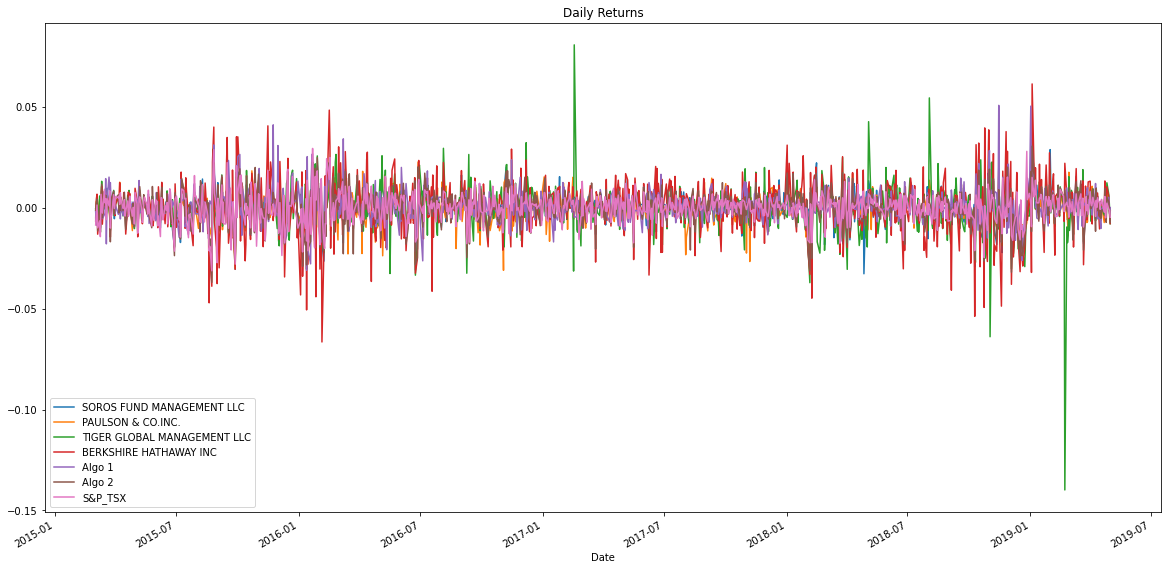

In [16]:
# Plot daily returns of all portfolios
all_portfolios.plot(figsize=(20, 10), title="Daily Returns")


#### Calculate and Plot cumulative returns.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Date,,,,,,,
2019-04-25,1.118163,0.754821,0.840272,1.348932,2.011144,1.196390,1.070504
2019-04-26,1.127275,0.761736,0.850654,1.363007,2.017139,1.202677,1.072916
2019-04-29,1.128689,0.763808,0.855971,1.370126,2.027645,1.206080,1.072071
2019-04-30,1.127228,0.762119,0.855749,1.365054,2.021675,1.204187,1.070803
2019-05-01,1.120637,0.761096,0.848958,1.354361,2.021865,1.195327,1.065767


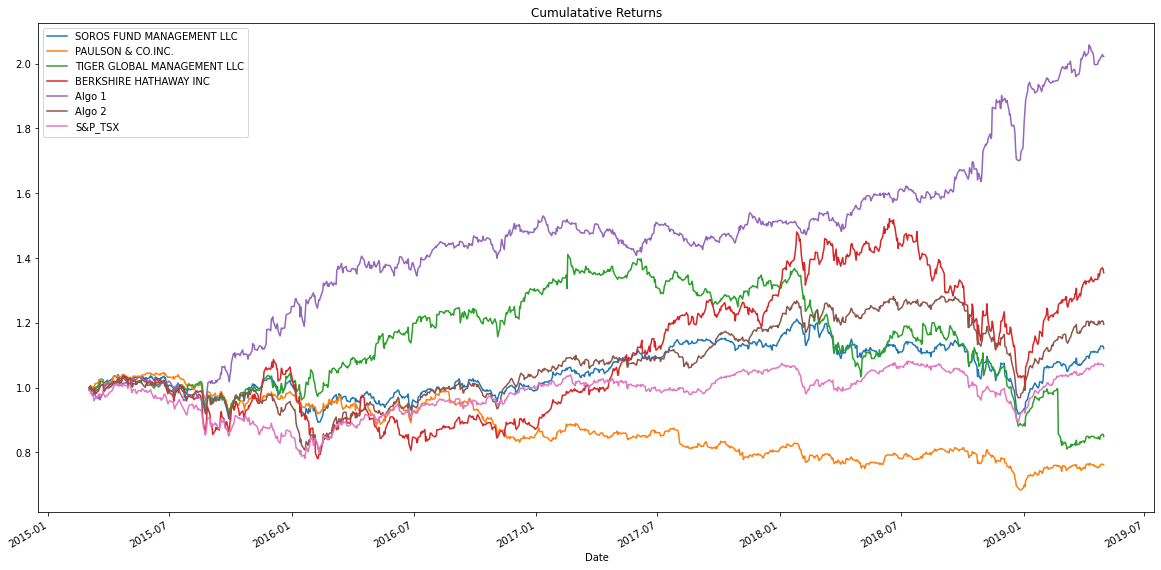

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolios).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulatative Returns")

cumulative_returns.tail(5)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


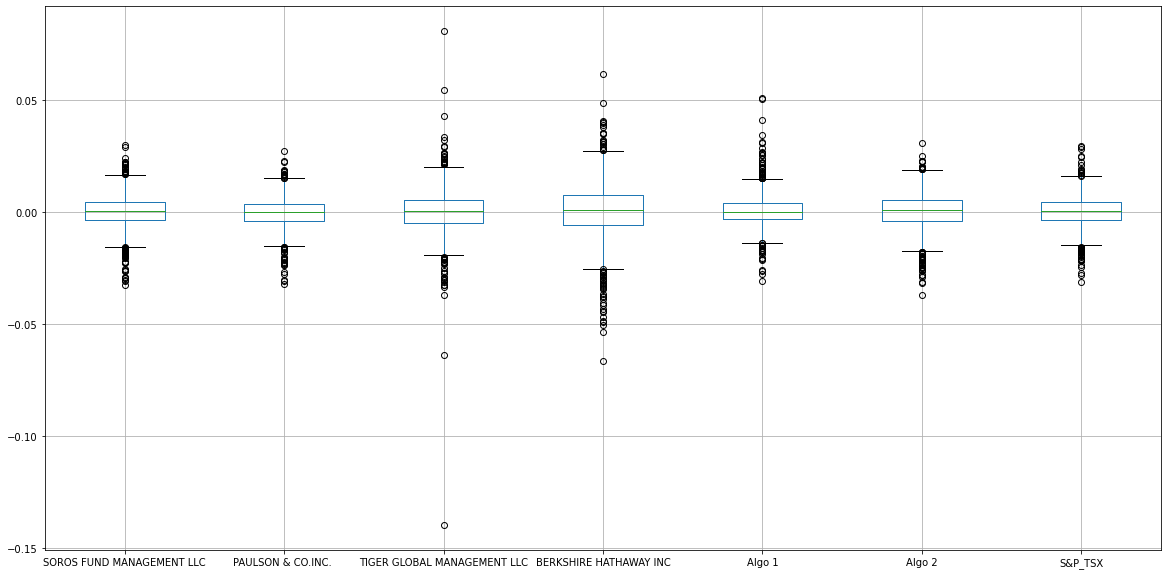

In [18]:
# Box plot to visually show risk
boxplot = all_portfolios.boxplot(figsize=(20,10))


### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
print("The standard deviation of all portfolios is as follows:")
allportfolios_std = all_portfolios.std()
print(allportfolios_std)


The standard deviation of all portfolios is as follows:
SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P_TSX                        0.007034
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60


print("Answer: Portfolios that have higher Standard Deviation value as compared to S&P are considered riskier, and therefore all portfolios are riskier than S&P TSX60 with exception of PAULSON & CO. Inc")


#The standard deviation of S&P_TSX is : 0.007030988730623963
#Q:Determine which portfolios are riskier than the S&P TSX 60
#Answer: Portfolios that have higher Standard Deviation value as compared to S&P are considered riskier, and therefore all portfolios are riskier than S&P TSX60 with exception of PAULSON & CO. Inc


Answer: Portfolios that have higher Standard Deviation value as compared to S&P are considered riskier, and therefore all portfolios are riskier than S&P TSX60 with exception of PAULSON & CO. Inc


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = allportfolios_std * np.sqrt(252)
print(annualized_std)

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P_TSX                        0.111664
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

The rolling standard deviation of all portfolios is as follows:
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                        NaN                 NaN   
2015-03-05                        NaN                 NaN   
2015-03-06                        NaN                 NaN   
2015-03-09                        NaN                 NaN   
2015-03-10                        NaN                 NaN   
2015-03-11                        NaN                 NaN   
2015-03-12                        NaN                 NaN   
2015-03-13                        NaN                 NaN   
2015-03-16                        NaN                 NaN   
2015-03-17                        NaN                 NaN   
2015-03-18                        NaN                 NaN   
2015-03-19                        NaN                 NaN   
2015-03-20           

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='Date'>

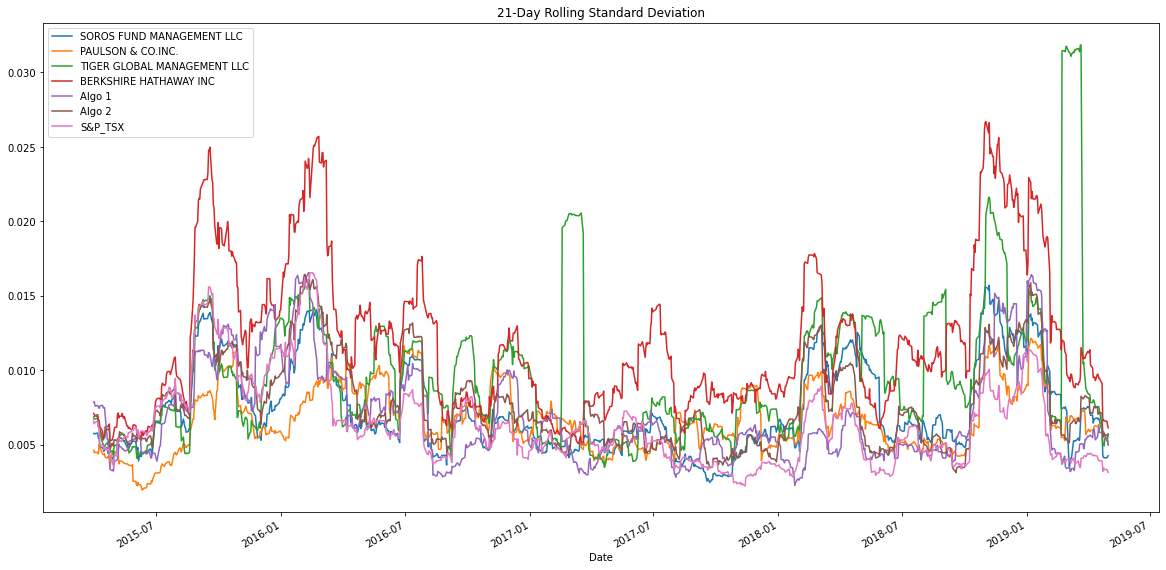

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

print("The rolling standard deviation of all portfolios is as follows:")
allportfolios_rolling_std = all_portfolios.rolling(21).std()
print(allportfolios_rolling_std.head(30))

# Plot the rolling standard deviation
allportfolios_rolling_std.plot(figsize=(20, 10), title="21-Day Rolling Standard Deviation")


### Calculate and plot the correlation

The Correlation Matrix of all portfolios is as follows:
                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.697076   
PAULSON & CO.INC.                             0.697076            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.560964            0.433034   
BERKSHIRE HATHAWAY INC                        0.750181            0.540033   
Algo 1                                        0.313795            0.266363   
Algo 2                                        0.826667            0.674015   
S&P_TSX                                       0.673930            0.486511   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.560964   
PAULSON & CO.INC.                               0.433034   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.423524   
Algo 1             

<AxesSubplot:>

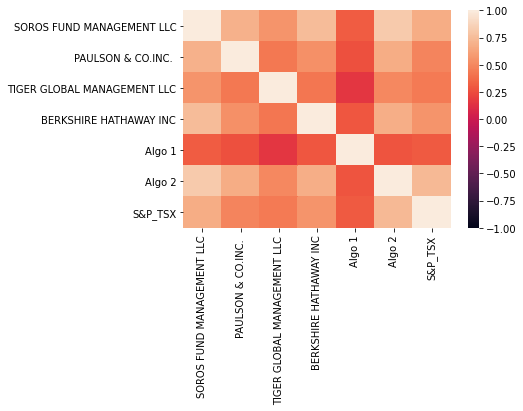

In [23]:
#Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60
# Calculate the correlation

corr_matrix = all_portfolios.corr() 
# Display de correlation matrix
print("The Correlation Matrix of all portfolios is as follows:")
print(corr_matrix)
print("Algo 2 portfolio mimics S&P_TSX 60 based on their correlation value")

sns.heatmap(corr_matrix, vmin=-1, vmax=1,)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [24]:
# Calculate covariance of a single portfolio
print("The Covariance of portfolios is as follows:")
all_portfolios.cov()

The Covariance of portfolios is as follows:


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
SOROS FUND MANAGEMENT LLC,0.000061,0.000038,0.000048,0.000075,0.000019,0.000054,0.000037
PAULSON & CO.INC.,0.000038,0.000049,0.000033,0.000048,0.000014,0.000039,0.000024
TIGER GLOBAL MANAGEMENT LLC,0.000048,0.000033,0.000118,0.000059,0.000013,0.000046,0.000034
BERKSHIRE HATHAWAY INC,0.000075,0.000048,0.000059,0.000164,0.000028,0.000073,0.000050
Algo 1,0.000019,0.000014,0.000013,0.000028,0.000058,0.000018,0.000017
Algo 2,0.000054,0.000039,0.000046,0.000073,0.000018,0.000069,0.000043
S&P_TSX,0.000037,0.000024,0.000034,0.000050,0.000017,0.000043,0.000049


In [25]:
soros_covariance = all_portfolios.cov()["Algo 2"]
print(soros_covariance)

SOROS FUND MANAGEMENT LLC      0.000054
PAULSON & CO.INC.              0.000039
TIGER GLOBAL MANAGEMENT LLC    0.000046
BERKSHIRE HATHAWAY INC         0.000073
Algo 1                         0.000018
Algo 2                         0.000069
S&P_TSX                        0.000043
Name: Algo 2, dtype: float64


In [26]:
# Calculate variance of S&P TSX
print("The Variance of S&P_TSX is as follows:")
sp_variance = all_portfolios.var()['S&P_TSX']
print(sp_variance)

The Variance of S&P_TSX is as follows:
4.9479515915131015e-05


In [27]:
# Computing beta for SOROS
# Calculate Covariance fr SORS

covariance = all_portfolios['SOROS FUND MANAGEMENT LLC'].cov(all_portfolios['S&P_TSX'])
covariance

3.710689907855223e-05

In [28]:
# Computing variance for SOROS

variance = all_portfolios['SOROS FUND MANAGEMENT LLC'].var()
variance


6.127095450887607e-05

In [29]:
Beta_for_Soros = covariance / variance
print(f"Beta for SOROS fund portfolio is: {round(Beta_for_Soros,2)}")

Beta for SOROS fund portfolio is: 0.61


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [30]:
# Use `ewm` to calculate the rolling window
# Assuming that Challenge is optional. Skipping on that basis.

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
annualised_sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
print(f"Annualised Sharpe Ratios are as follows:")
annualised_sharpe_ratios

Annualised Sharpe Ratios are as follows:


SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P_TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

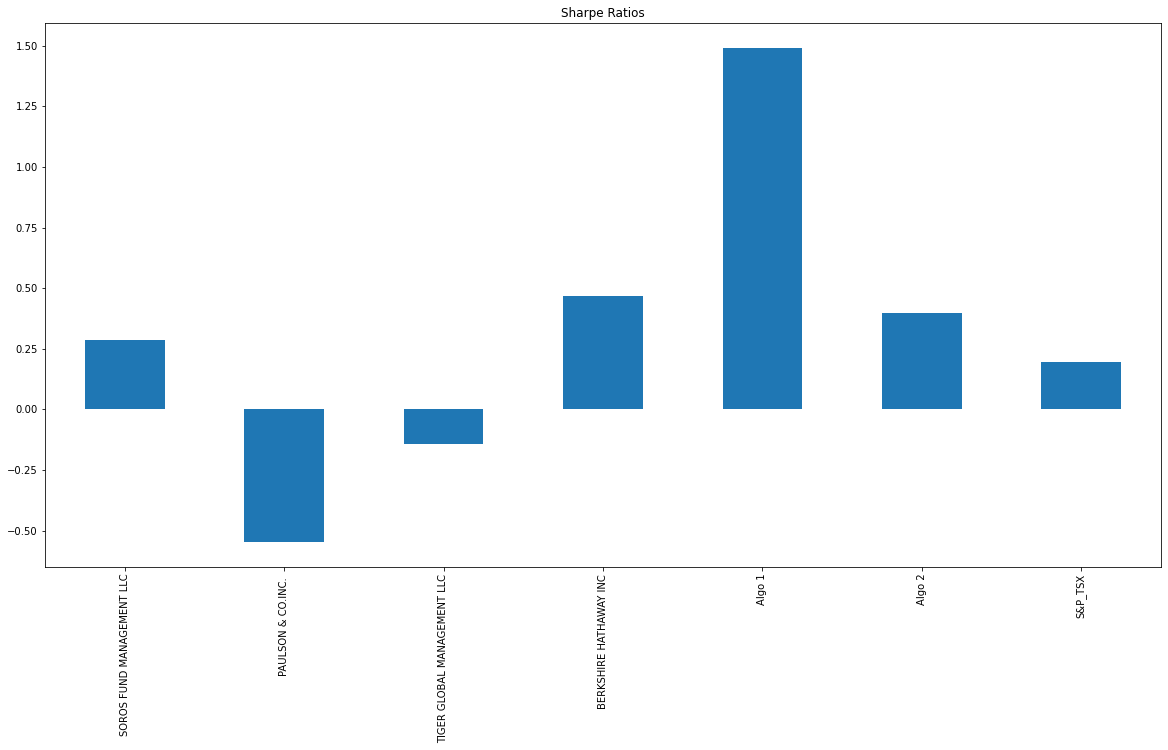

In [32]:
# Visualize the sharpe ratios as a bar plot
annualised_sharpe_ratios.plot(figsize=(20, 10),kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [33]:
# Reading data from SHOPIFY stock
shop_csv = Path("./Resources/shop_historical.csv")
shop_df = pd.read_csv(shop_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_df.rename( columns={"Symbol": "SHOP","Close":"Shopify"},inplace = True )
shop_df.drop(columns=['SHOP'], axis=1, inplace = True)
shop_df.head(5)

,Shopify
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [34]:
# Reading data for Opex Text stock
otex_csv = Path("./Resources/otex_historical.csv")
otex_df = pd.read_csv(otex_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_df.rename( columns={"Symbol": "OTEX","Close":"Otex"},inplace = True )
otex_df.drop(columns=['OTEX'], axis=1, inplace = True)
otex_df.head(5)

,Otex
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [35]:
# Reading data from 3rd stock
loblaw_csv = Path("./Resources/l_historical.csv")
loblaw_df = pd.read_csv(loblaw_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
loblaw_df.rename( columns={"Symbol": "LOBLAW","Close":"Loblaw"},inplace = True )
loblaw_df.drop(columns=['LOBLAW'], axis=1, inplace = True)
loblaw_df.head(5)

,Loblaw
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [36]:
# Combine all stocks in a single DataFrame
custom_portfolio_df = pd.concat([shop_df,otex_df,loblaw_df], axis='columns', join='inner')
custom_portfolio_df.head()

,Shopify,Otex,Loblaw
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [37]:
# Reset Date index
custom_portfolio_df.sort_index(inplace=True)
custom_portfolio_df.head()

,Shopify,Otex,Loblaw
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [38]:
# Reorganize portfolio data by having a column per symbol


In [39]:
# Calculate daily returns

# Drop NAs
custom_portfolio_df.isnull().sum()

# Display sample data
custom_portfolio_df.head(5)


,Shopify,Otex,Loblaw
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [40]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
# Display sample data

custom_portfolio_daily_returns = custom_portfolio_df.pct_change()
#custom_portfolio_daily_returns.head()

cp_weighted_returns = custom_portfolio_daily_returns.dot(weights)
cp_weighted_returns_df = pd.DataFrame(cp_weighted_returns)
cp_weighted_returns_df.head()




,0
Date,
2018-01-02,NaN
2018-01-03,0.000565
2018-01-04,0.004517
2018-01-05,-0.003126
2018-01-08,-0.000997


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [41]:
# Join your returns DataFrame to the original returns DataFrame
combined_portofolio = pd.concat([cp_weighted_returns_df, all_portfolios], axis='columns', join='inner')
combined_portofolio.rename(columns= {0: "Custom"},inplace = True )
combined_portofolio.dropna(inplace=True)
combined_portofolio.sort_index()
combined_portofolio.head()


,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


In [42]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portofolio.isnull().sum()

Custom                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P_TSX                        0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized `std`
combined_portofolio.std()
combined_annualized_variance = (combined_portofolio.var()*252)
combined_annualized_variance = np.sqrt(combined_annualized_variance)
combined_annualized_variance

Custom                         0.224346
SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P_TSX                        0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation for Custom-Combined Portfolios'}, xlabel='Date'>

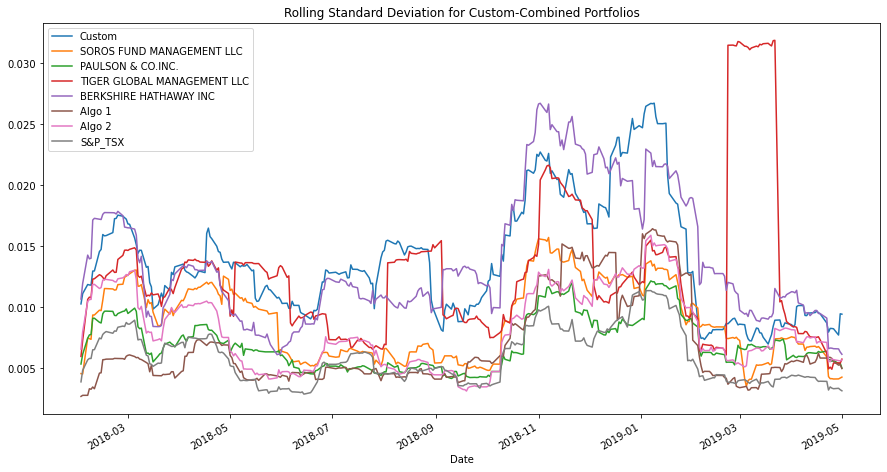

In [44]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
combined_portofolio.rolling(window=21).std().plot(figsize=(15,8),title="Rolling Standard Deviation for Custom-Combined Portfolios")

### Calculate and plot the correlation

In [45]:
# Calculate the correlation
combined_correlation = combined_portofolio.corr()
combined_correlation



,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Custom,1.000000,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228
SOROS FUND MANAGEMENT LLC,0.556093,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681
PAULSON & CO.INC.,0.385305,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728
TIGER GLOBAL MANAGEMENT LLC,0.303971,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781
BERKSHIRE HATHAWAY INC,0.647413,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817
Algo 1,0.214770,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789
Algo 2,0.563756,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326
S&P_TSX,0.579228,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000


<AxesSubplot:>

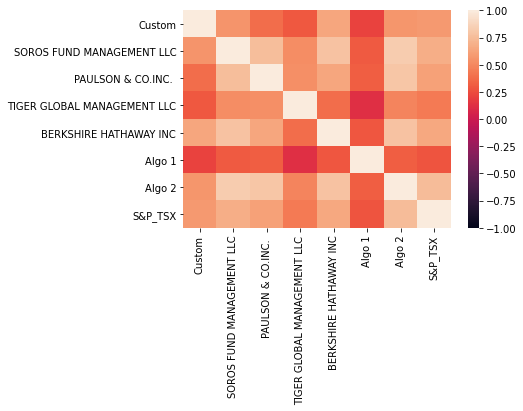

In [46]:
#Plot the correlation
sns.heatmap(combined_correlation, vmin=-1, vmax=1,)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Custom Portfolio Beta'}, xlabel='Date'>

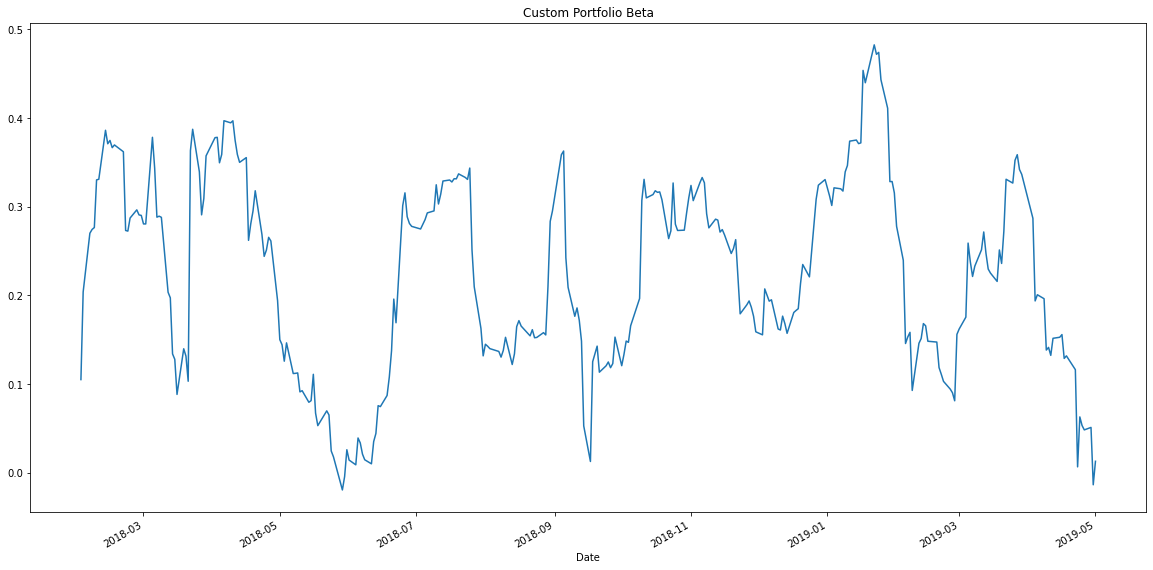

In [47]:
# Calculate and plot Beta
combined_rolling_variance = combined_portofolio['Custom'].rolling(window=21).var()
combined_rolling_covariance = combined_portofolio['Custom'].rolling(window=21).cov(combined_portofolio['S&P_TSX'])
combined_rolling_beta = combined_rolling_covariance / combined_rolling_variance
combined_rolling_beta.plot(figsize=(20, 10), title='Custom Portfolio Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [48]:
# Calculate Annualzied Sharpe Ratios
combined_sharpe_ratios = (combined_portofolio.mean() * 252) / ((combined_portofolio).std() * np.sqrt(252))
combined_sharpe_ratios

Custom                         1.564547
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P_TSX                        0.034651
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

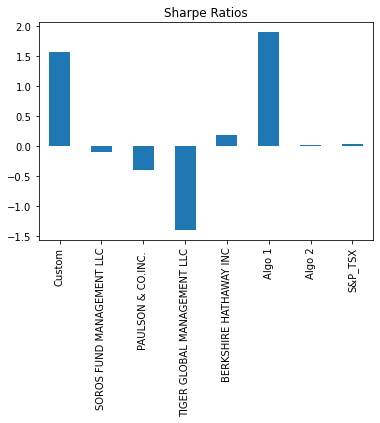

In [49]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [50]:
print("My customer portfolio will provide 1.5x more returns as it is higher volatile and risk. The benefit is increased return for holding a riskier asset")

My customer portfolio will provide 1.5x more returns as it is higher volatile and risk. The benefit is increased return for holding a riskier asset
